## Import Libraries and Data

In [5]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_InitialDoE_Feb.csv', firstRow=96, lastRow=102)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_310123_S97-102_1.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse water addition

In [6]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=88s and ended at t=494s; mass=44.96445g
This equals a volume of 45.055m; expected was 45.168mL; error is 0.252%


## Analyise surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


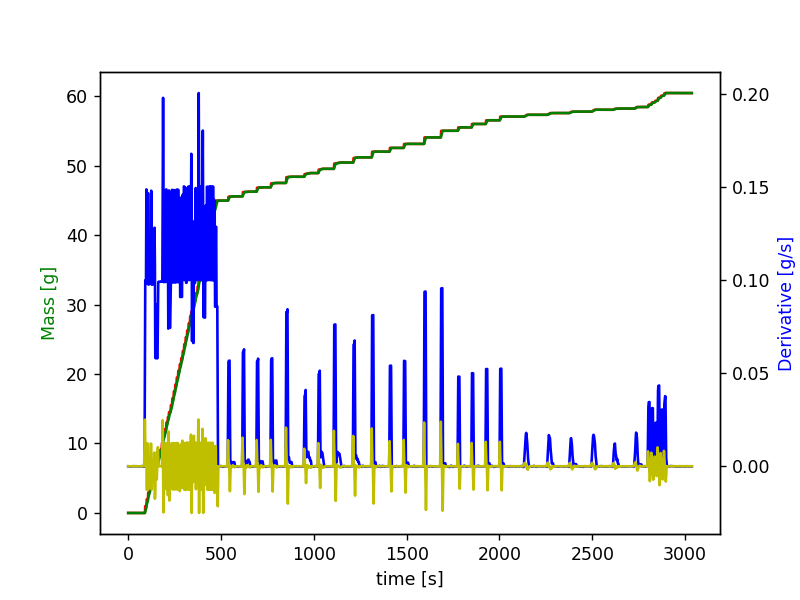

Addition of 0.611g Plantapon ACG 50 detected from 534s to 580s - expected volume = 0.566mL and actual volume = 0.545mL (resulting error is 3.732%)
Addition of 0.688g Plantapon ACG 50 detected from 612s to 662s - expected volume = 0.566mL and actual volume = 0.614mL (resulting error is 8.409%)
Addition of 0.62g Plantapon ACG 50 detected from 688s to 732s - expected volume = 0.524mL and actual volume = 0.551mL (resulting error is 5.102%)
Addition of 0.633g Plantapon ACG 50 detected from 764s to 806s - expected volume = 0.524mL and actual volume = 0.562mL (resulting error is 7.339%)
Addition of 0.899g Plantapon ACG 50 detected from 846s to 888s - expected volume = 0.755mL and actual volume = 0.789mL (resulting error is 4.547%)
Addition of 0.532g Plantapon LC 7 detected from 944s to 992s - expected volume = 0.57mL and actual volume = 0.506mL (resulting error is 11.317%)
Addition of 0.617g Plantapon LC 7 detected from 1020s to 1060s - expected volume = 0.57mL and actual volume = 0.586mL (re

In [7]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


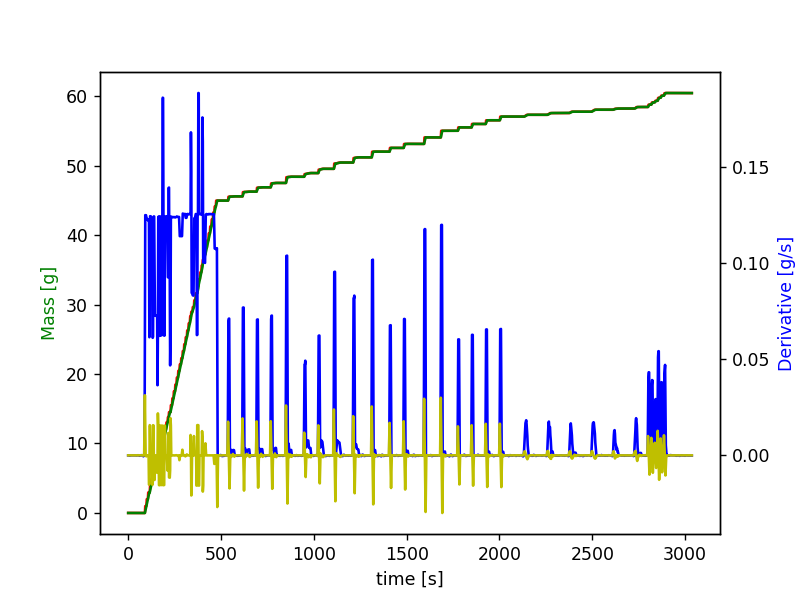

Addition of 0.263g Luviquat Excellence detected from 2128s to 2162s - expected volume = 0.265mL and actual volume = 0.24mL (resulting error is 9.44%)
Addition of 0.264g Luviquat Excellence detected from 2254s to 2292s - expected volume = 0.237mL and actual volume = 0.241mL (resulting error is 1.587%)
Addition of 0.206g Luviquat Excellence detected from 2372s to 2416s - expected volume = 0.171mL and actual volume = 0.185mL (resulting error is 8.355%)
Addition of 0.281g Luviquat Excellence detected from 2492s to 2526s - expected volume = 0.255mL and actual volume = 0.255mL (resulting error is 0.223%)
Addition of 0.173g Luviquat Excellence detected from 2608s to 2644s - expected volume = 0.134mL and actual volume = 0.155mL (resulting error is 15.583%)
Addition of 0.234g Luviquat Excellence detected from 2722s to 2768s - expected volume = 0.209mL and actual volume = 0.212mL (resulting error is 1.793%)


In [8]:
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=6, mergeSens=7, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.0011250000000000001 g/s^2


<IPython.core.display.Javascript object>


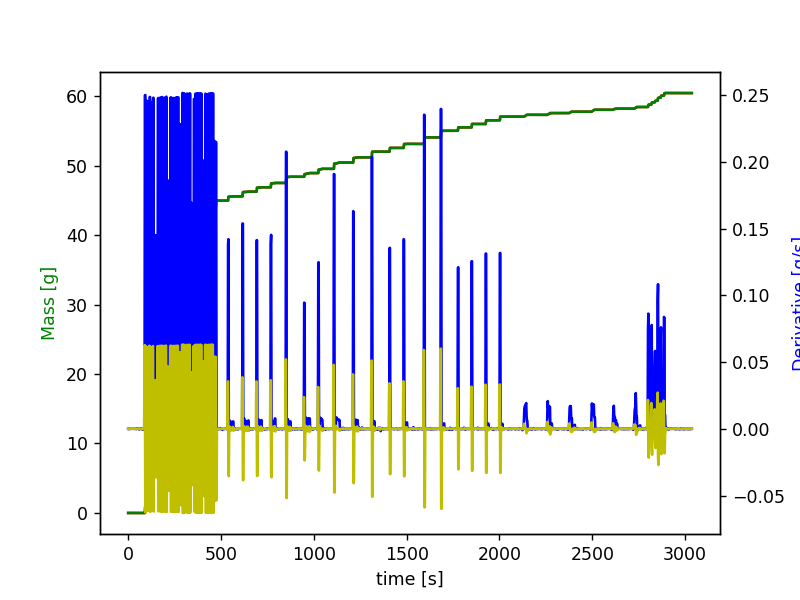

Addition of 0.344g Arlypon TT detected from 2796s to 2810s - expected volume = 0.38mL and actual volume = 0.363mL (resulting error is 4.306%)
Addition of 0.313g Arlypon TT detected from 2814s to 2828s - expected volume = 0.283mL and actual volume = 0.329mL (resulting error is 15.926%)
Addition of 0.234g Arlypon TT detected from 2832s to 2846s - expected volume = 0.187mL and actual volume = 0.243mL (resulting error is 30.0%)
Addition of 0.434g Arlypon TT detected from 2848s to 2862s - expected volume = 0.43mL and actual volume = 0.455mL (resulting error is 5.976%)
Addition of 0.307g Arlypon TT detected from 2864s to 2878s - expected volume = 0.257mL and actual volume = 0.315mL (resulting error is 22.8%)
Addition of 0.378g Arlypon TT detected from 2882s to 2898s - expected volume = 0.345mL and actual volume = 0.395mL (resulting error is 14.394%)


In [9]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=9, mergeSens=2, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [10]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_S97-S102.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_3624\1626766494.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
96,97.0,0.0,12.745573,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,11.01864,0.000000,0.000000,2.575445,0.0,0.0,0.0,0.0,3.378357
97,98.0,0.0,12.200569,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,9.121712,0.000000,2.570987,0.0,0.0,0.0,0.0,3.046735
98,99.0,0.0,8.824874,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,9.604203,2.020711,0.0,0.0,0.0,0.0,2.296764
99,100.0,0.0,0.000000,11.517293,7.502384,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,2.813895,0.0,0.0,0.0,0.0,4.356838
100,101.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,9.570806,10.581633,1.709777,0.0,0.0,0.0,0.0,3.027550
101,102.0,0.0,0.000000,9.002142,0.000000,0.0,8.249981,0.0,0.0,0.0,0.00000,0.000000,0.000000,2.320152,0.0,0.0,0.0,0.0,3.740982
